In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [ ]:
match.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
966,478,2,114.0
967,479,1,168.0
968,479,2,170.0
969,480,1,152.0


In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
959,476,1,152.0
963,477,1,172.0
965,478,1,148.0
967,479,1,168.0


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,IPL-2014,Abu Dhabi,29-04-2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN,476,152.0
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN,477,172.0
477,478,IPL-2014,Ranchi,02-05-2014,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,34,0,RA Jadeja,JSCA International Stadium Complex,AK Chaudhary,NJ Llong,NaN,478,148.0
478,479,IPL-2014,Mumbai,03-05-2014,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,BNJ Oxenford,C Shamshuddin,NaN,479,168.0


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]


In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(385, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,IPL-2014,Abu Dhabi,29-04-2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN,476,152.0
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN,477,172.0
477,478,IPL-2014,Ranchi,02-05-2014,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,34,0,RA Jadeja,JSCA International Stadium Complex,AK Chaudhary,NJ Llong,NaN,478,148.0
478,479,IPL-2014,Mumbai,03-05-2014,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,BNJ Oxenford,C Shamshuddin,NaN,479,168.0


In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91939,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,4.0,KK Nair,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
91940,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,5.0,KK Nair,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
91941,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,6.0,SV Samson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
91942,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,7.0,SV Samson,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91939,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,4.0,KK Nair,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
91940,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,5.0,KK Nair,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
91941,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,6.0,SV Samson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
91942,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,7.0,SV Samson,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [ ]:
 delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91939,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,4.0,KK Nair,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,22.0,130.0,98.0
91940,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,5.0,KK Nair,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,23.0,129.0,97.0
91941,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,6.0,SV Samson,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,23.0,129.0,96.0
91942,480,Delhi,Rajasthan Royals,152.0,2,Rajasthan Royals,Delhi Daredevils,4.0,7.0,SV Samson,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,27.0,125.0,95.0


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10,8.4


In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

125      6.00
126      3.00
127      2.00
128      4.50
129      8.40
         ... 
91939    6.00
91940    6.00
91941    5.75
91942    6.48
91943     NaN
Length: 44415, dtype: float64

In [ ]:
(delivery_df['runs_left']*6)/delivery_df['balls_left']

125      10.386555
126      10.474576
127      10.564103
128      10.551724
129      10.434783
           ...    
91939     7.959184
91940     7.979381
91941     8.062500
91942     7.894737
91943          NaN
Length: 44415, dtype: float64

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
 delivery_df.apply(result,axis=1)

125      0
126      0
127      0
128      0
129      0
        ..
91939    1
91940    1
91941    1
91942    1
91943    1
Length: 44415, dtype: int64

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,119.0,10,207.0,6.00,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,118.0,10,207.0,3.00,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,117.0,10,207.0,2.00,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204.0,116.0,10,207.0,4.50,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200.0,115.0,10,207.0,8.40,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
91939,Rajasthan Royals,Delhi Daredevils,Delhi,130.0,98.0,9,152.0,6.00,7.959184,1
91940,Rajasthan Royals,Delhi Daredevils,Delhi,129.0,97.0,9,152.0,6.00,7.979381,1
91941,Rajasthan Royals,Delhi Daredevils,Delhi,129.0,96.0,9,152.0,5.75,8.062500,1
91942,Rajasthan Royals,Delhi Daredevils,Delhi,125.0,95.0,9,152.0,6.48,7.894737,1


In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample(125)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
73736,Kolkata Knight Riders,Rajasthan Royals,Jaipur,49.0,31.0,3,144.0,6.404494,9.483871,0
15250,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,25.0,39.0,9,143.0,8.740741,3.846154,1
31355,Kolkata Knight Riders,Chennai Super Kings,Centurion,60.0,32.0,8,188.0,8.727273,11.250000,1
626,Mumbai Indians,Kolkata Knight Riders,Mumbai,174.0,117.0,10,178.0,8.000000,8.923077,1
21030,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,166.0,110.0,9,179.0,7.800000,9.054545,0
...,...,...,...,...,...,...,...,...,...,...
62323,Rajasthan Royals,Deccan Chargers,Jaipur,75.0,38.0,7,196.0,8.853659,11.842105,1
81871,Rajasthan Royals,Delhi Daredevils,Jaipur,27.0,28.0,9,154.0,8.282609,5.785714,1
42548,Rajasthan Royals,Kings XI Punjab,Jaipur,13.0,42.0,9,153.0,10.769231,1.857143,1
64002,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,90.0,34.0,6,189.0,6.906977,15.882353,0


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
49401,Kings XI Punjab,Chennai Super Kings,Chandigarh,123.0,84.0,9,188.0,10.833333,8.785714
84033,Mumbai Indians,Sunrisers Hyderabad,Mumbai,31.0,17.0,6,178.0,8.563107,10.941176
24012,Mumbai Indians,Kings XI Punjab,Durban,73.0,62.0,6,119.0,4.758621,7.064516
70732,Delhi Daredevils,Kings XI Punjab,Dharamsala,75.0,79.0,10,141.0,9.658537,5.696203
47558,Royal Challengers Bangalore,Deccan Chargers,Mumbai,14.0,51.0,9,82.0,5.913043,1.647059
...,...,...,...,...,...,...,...,...,...
55225,Mumbai Indians,Kings XI Punjab,Chandigarh,123.0,76.0,7,163.0,5.454545,9.710526
44260,Rajasthan Royals,Mumbai Indians,Jaipur,47.0,7.0,3,174.0,6.743363,40.285714
78741,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,118.0,86.0,9,144.0,4.588235,8.232558
67683,Deccan Chargers,Kings XI Punjab,Hyderabad,39.0,8.0,2,170.0,7.017857,29.250000


In [ ]:
y

49401    1
84033    1
24012    0
70732    1
47558    1
        ..
55225    0
44260    0
78741    1
67683    0
15664    1
Name: result, Length: 43437, dtype: int64

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
24453,Rajasthan Royals,Chennai Super Kings,Centurion,157.0,112.0,10,164.0,5.250000,8.410714
82780,Delhi Daredevils,Royal Challengers Bangalore,Delhi,123.0,79.0,7,183.0,8.780488,9.341772
41770,Royal Challengers Bangalore,Delhi Daredevils,Delhi,130.0,62.0,8,184.0,5.586207,12.580645
58266,Royal Challengers Bangalore,Chennai Super Kings,Chennai,204.0,117.0,10,205.0,2.000000,10.461538
71704,Mumbai Indians,Chennai Super Kings,Bangalore,140.0,88.0,9,187.0,8.812500,9.545455
...,...,...,...,...,...,...,...,...,...
19234,Rajasthan Royals,Mumbai Indians,Jaipur,78.0,58.0,7,145.0,6.483871,8.068966
89207,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah,23.0,17.0,7,150.0,7.398058,8.117647
11018,Royal Challengers Bangalore,Delhi Daredevils,Delhi,78.0,45.0,7,191.0,9.040000,10.400000
74405,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,103.0,76.0,9,154.0,6.954545,8.131579


In [ ]:
y_train

24453    0
82780    0
41770    0
58266    0
71704    0
        ..
19234    1
89207    0
11018    0
74405    1
48967    1
Name: result, Length: 34749, dtype: int64

In [ ]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
29540,Royal Challengers Bangalore,Chennai Super Kings,Durban,112.0,107.0,8,129.0,7.846154,6.280374
44206,Rajasthan Royals,Mumbai Indians,Jaipur,115.0,61.0,6,174.0,6.000000,11.311475
72455,Kolkata Knight Riders,Delhi Daredevils,Kolkata,57.0,62.0,8,128.0,7.344828,5.516129
23800,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,32.0,25.0,7,139.0,6.757895,7.680000
49911,Kolkata Knight Riders,Rajasthan Royals,Jaipur,78.0,69.0,9,159.0,9.529412,6.782609
...,...,...,...,...,...,...,...,...,...
20864,Deccan Chargers,Kolkata Knight Riders,Cape Town,55.0,72.0,8,101.0,5.750000,4.583333
47735,Mumbai Indians,Chennai Super Kings,Mumbai,135.0,83.0,9,168.0,5.351351,9.759036
82252,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,219.0,118.0,10,223.0,12.000000,11.135593
59957,Mumbai Indians,Deccan Chargers,Visakhapatnam,30.0,17.0,6,138.0,6.291262,10.588235


In [ ]:
y_test

29540    1
44206    0
72455    1
23800    1
49911    1
        ..
20864    1
47735    0
82252    0
59957    1
48455    1
Name: result, Length: 8688, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe= Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.826427255985267

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,0,70.0,30.0
10467,2,8.0,0,64.2,35.8
10473,3,1.0,0,71.2,28.8
10479,4,7.0,1,80.1,19.9
10485,5,12.0,0,70.9,29.1
10491,6,13.0,0,58.3,41.7
10497,7,9.0,0,51.9,48.1
10505,8,15.0,0,35.3,64.7
10511,9,7.0,0,32.7,67.3
10518,10,17.0,0,17.7,82.3


Text(0.5, 1.0, 'Target-178.0')

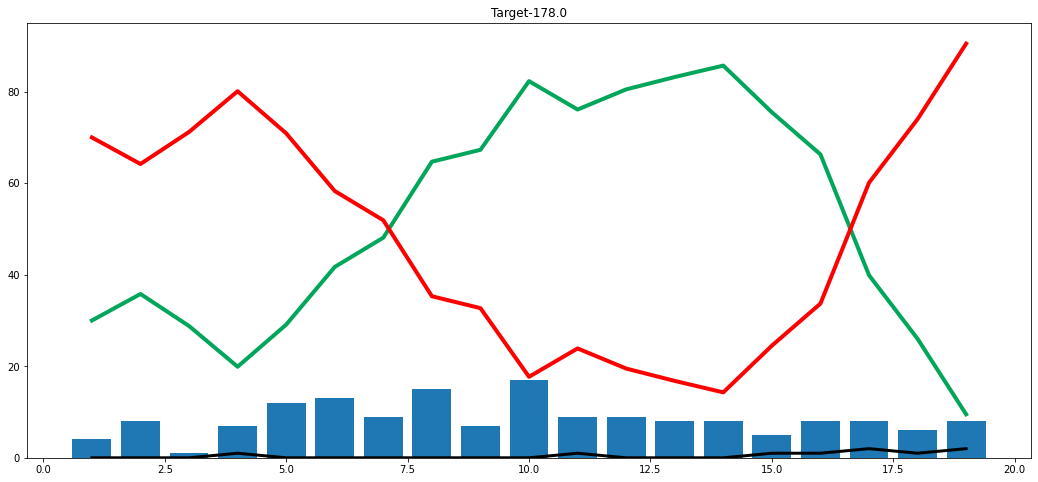

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='black',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))